# Audio Deep Learning Made Simple: Sound Classification, Step-by-Step
## Dataset Usage Testing

In [1]:
import pandas as pd
from pathlib import Path 

datasource_path = Path.home()/'dataset'/'UrbanSound8K'

# read the metadata file
metadata_file_path = datasource_path/'metadata'/'UrbanSound8K.csv'
df = pd.read_csv(metadata_file_path)
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [2]:
df['path'] = '/fold' + df['fold'].astype(str) + '/' + df['slice_file_name'].astype(str)
df = df[['path', 'classID']]
df.head()

,path,classID
0,/fold5/100032-3-0-0.wav,3
1,/fold5/100263-2-0-117.wav,2
2,/fold5/100263-2-0-121.wav,2
3,/fold5/100263-2-0-126.wav,2
4,/fold5/100263-2-0-137.wav,2


## Audio File Reading
```python
pip install playsound
```

In [3]:
from playsound import playsound
audio_path = datasource_path/'audio'
audio_sample_path = audio_path/'fold5'/'100032-3-0-0.wav'
print(audio_sample_path)
playsound(str(audio_sample_path))

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


/root/dataset/UrbanSound8K/audio/fold5/100032-3-0-0.wav


In [4]:
from lib.wavUtil import WavOps
(sig, sr) = WavOps.open(audio_sample_path)
sig.shape, sr

(torch.Size([2, 14004]), 44100)

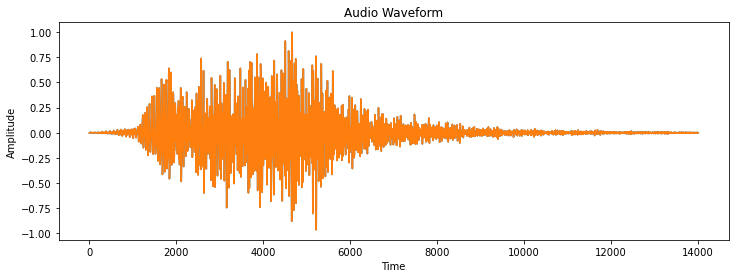

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(sig.numpy().T)
plt.title('Audio Waveform')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.show()

## Prepare the DataLoader

In [6]:
from torch.utils.data import DataLoader, random_split
from lib.wavDataUtil import WavDataset

audioDS = WavDataset(df, audio_path)

sample_num = len(audioDS)
train_num = round(sample_num * .8)
val_num = sample_num - train_num

train_ds, val_ds = random_split(audioDS, [train_num, val_num])
train_dl = DataLoader(dataset=train_ds, batch_size=16, shuffle=True)
val_dl = DataLoader(dataset=val_ds, batch_size=16, shuffle=False)

audio, class_id = audioDS[0]
audio.shape, class_id

(torch.Size([2, 64, 344]), 3)

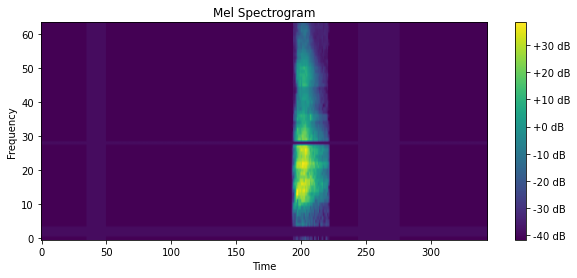

In [7]:
plt.figure(figsize=(10,4))
plt.imshow(audio[0].detach().numpy(), cmap='viridis', origin='lower', aspect='auto')
plt.title('Mel Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(format='%+2.0f dB')
plt.show()